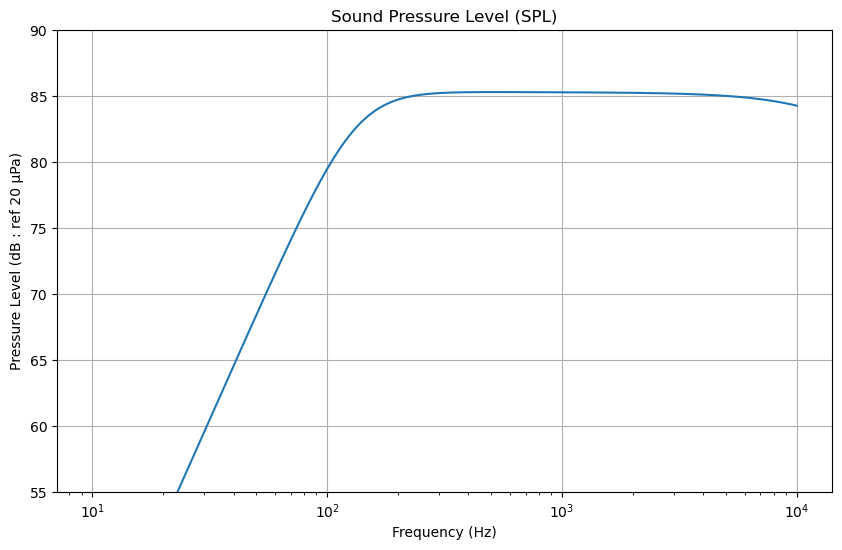

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
pi = np.pi
sqrt = np.sqrt

# Frequency and angular frequency array
freq = np.linspace(10, 10000, 100000)
omegas = freq * 2 * pi

# Loudspeaker properties
B = 1 # Magnetic flux density (T)
rho0 = 1.2 # Air density (kg/m^3)
c0 = 340 # Speed of sound (m/s)
eta = 18e-6 # Air dynamic viscosity (Pa.s)

# Voice coil properties
length_coil = 80e-3 # Length of the coil (m)
layers_coil = 1 # Number of coil layers
rhoC = 8940 # Copper density (kg/m^3)
res_C = 1.82e-8 # Copper resistivity (Ohm.m)
a_coil = 2e-3 # Radius of the coil (m)
a_wire = 0.075e-3 # Radius of the wire (m)

# Calculate number of turns of the coil
N = length_coil * layers_coil / (a_wire * 2)

# Wire length, mass, and resistance of the voice coil
length_wire = 2 * pi * a_coil * N
M_wire = N * (a_coil * 2) * pi**2 * (a_wire * 2)**2 * rhoC / 4
R_E = 4 * a_coil * 2 * length_coil * res_C / ((2 * a_wire)**3) 

# Electrical resistance of the coil (Ohms)
# Coil inductance calculation
mu_r = 1 # Relative permeability of the coil material
mu_0 = 4 * pi * 10**-7 # Permeability of air (H/m)
H_coil = length_coil # Height of the coil
L_E = mu_r * mu_0 * N**2 * pi * a_coil**2 / H_coil

# Diaphragm and cabinet properties
diam_D = 0.14 # Diaphragm diameter (m)
S_D = pi * diam_D**2 / 4 # Area of the diaphragm (m^2)
cab_width = 0.192 # Cabinet width (m)
cab_height = 0.2 # Cabinet height (m)
cab_depth = 0.18 # Cabinet depth (m)
cab_volume = cab_width * cab_height * cab_depth # Cabinet volume (m^3)

# Stiffness of the air in the cabinet
K_MC = (rho0 * c0**2 * S_D**2) / cab_volume

# Defining mechanical properties
M_D = 10e-3 # Diaphragm mass (kg)
K_MS = 2800 # Suspension stiffness (N/m)
C_MS = 1 / K_MS # Compliance of the suspension (m/N)
K_MT = K_MS + K_MC # Total stiffness (N/m)
C_MT = 1 / K_MT # Total compliance (m/N)
M_MS = M_D + M_wire # Total moving mass (kg)

# Mechanical impedance
R_M = 6 # Mechanical resistance (kg/s)
Z_M = R_M + 1j * (omegas * M_MS - (1 / (omegas * C_MT)))

# Electrical impedance with back EMF
Bl = B * length_wire # BL product (Tm)
Z_EB = R_E + 1j * 2 * pi * freq * L_E
backEMF = Bl**2 / Z_M
Z_E = Z_EB + backEMF

# Calculate resonance frequency
f_s = ((K_MT) / (M_MS))**0.5 / (2 * pi)

# Mechanical quality factor calculation
Q_MS = (2 * pi * f_s * M_MS) / R_M

# Volume velocity calculation
V_in = 2.83 # Input voltage (V)
Q = Bl * S_D * V_in / (Z_EB * Z_M + Bl**2)

# On-axis frequency response (Sound Pressure Level)
r = 1 # Distance for pressure estimation (m)
P = rho0 * omegas * Q / (2 * pi * r)
SPL = 20 * np.log10(np.abs(P) / (2e-5)) - 6

# Calculate displacement amplitude for an input RMS voltage of 2.83 Vrms at 150 Hz
X = np.abs(Q / (1j * omegas * S_D)) # Displacement amplitude
X_max = np.abs(Q / (1j * 150 * S_D))

# Electroacoustic efficiency calculation
I = V_in / Z_E # Current
W_E = np.abs(I)**2 * R_E / 2 # Electrical power
realZ_AR = rho0 * omegas**2 / (2 * pi * c0) # Radiation impedance (real part)
W_A = np.abs(Q)**2 * realZ_AR # Acoustic power
eta_EA = W_A / W_E * 100 # Electroacoustic efficiency

# Quality factors
Q_MS = (2 * np.pi * f_s * M_MS) / R_M # Mechanical Q
Q_ES = (2 * np.pi * f_s * M_MS) / (Bl**2 / R_E) # Electrical Q
Q_TS = (Q_MS * Q_ES) / (Q_MS + Q_ES) # Total Q

# Plot Sound Pressure Level (SPL)
plt.figure(figsize=(10, 6))
plt.semilogx(freq, SPL)
plt.ylabel('Pressure Level (dB : ref 20 µPa)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.title('Sound Pressure Level (SPL)')
plt.ylim(55, 90)
plt.show()

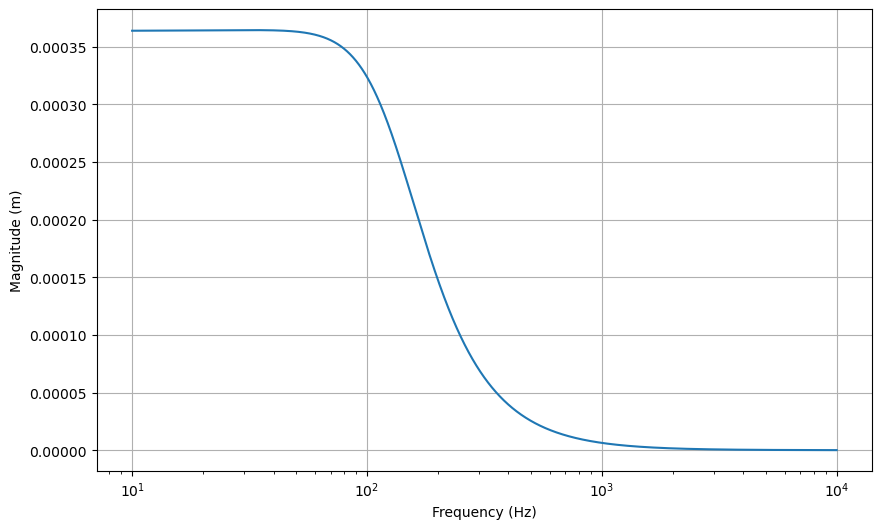

In [11]:
# Plot displacement amplitude vs frequency
plt.figure(figsize=(10, 6))
plt.semilogx(freq, X)
plt.ylabel('Magnitude (m)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.show()

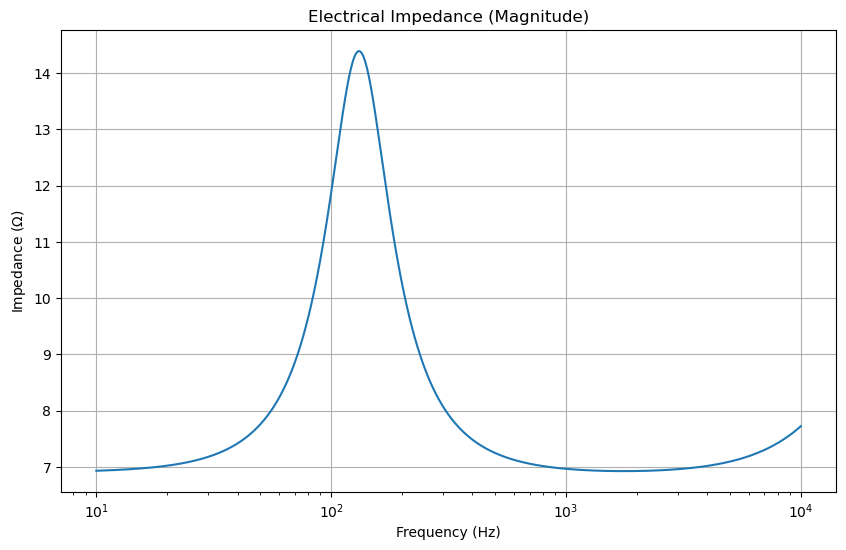

In [13]:
# Plot Electrical Impedance (Magnitude)
plt.figure(figsize=(10, 6))
plt.semilogx(freq, np.abs(Z_E))
plt.ylabel('Impedance ($\Omega$)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.title('Electrical Impedance (Magnitude)')
plt.show()

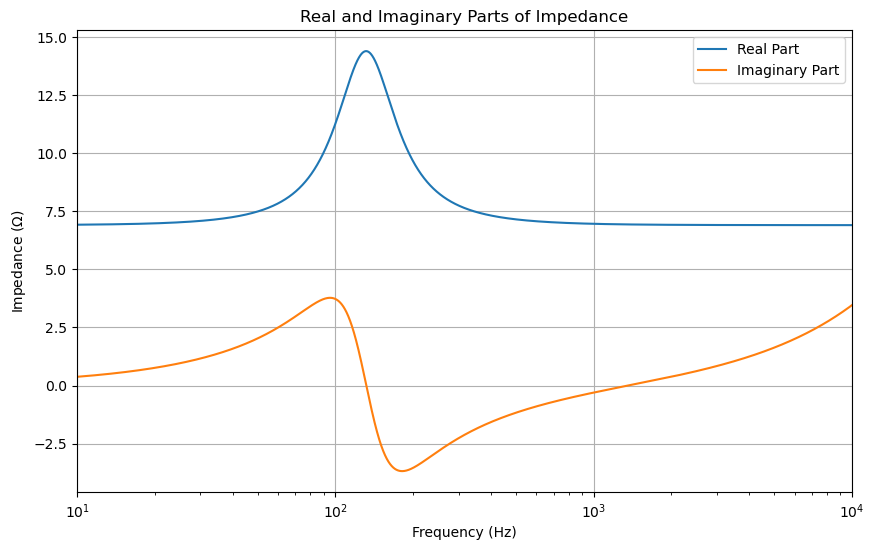

In [14]:
# Plot Real and Imaginary parts of Electrical Impedance
plt.figure(figsize=(10, 6))
plt.semilogx(freq, np.real(Z_E), label='Real Part')
plt.semilogx(freq, np.imag(Z_E), label='Imaginary Part')
plt.ylabel('Impedance ($\Omega$)')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
plt.xlim(10, 10000)
plt.title('Real and Imaginary Parts of Impedance')
plt.show()

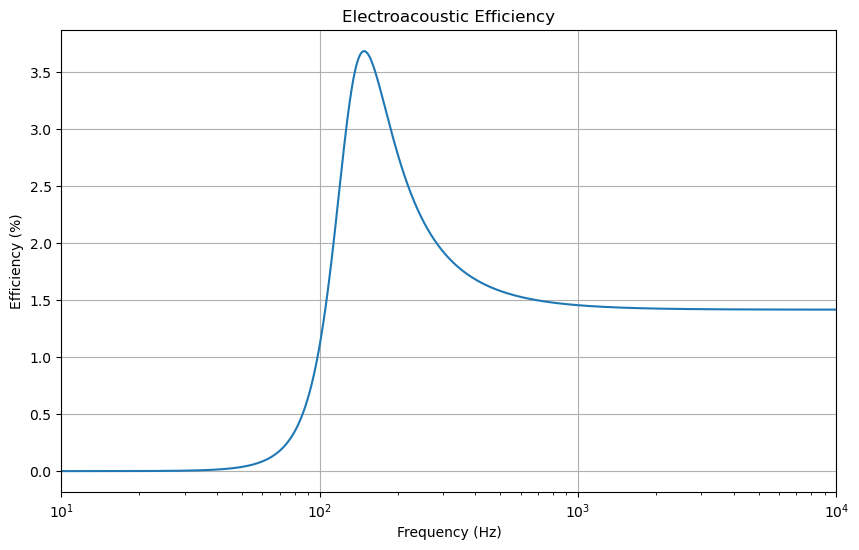

In [15]:
# Plot electroacoustic efficiency
plt.figure(figsize=(10, 6))
plt.semilogx(freq, eta_EA)
plt.ylabel('Efficiency (%)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.xlim(10, 10000)
plt.title('Electroacoustic Efficiency')
plt.show()

In [16]:
# Print all Thiele-small parameter
print(f"Resonance Frequency (f_s): {f_s:.2f} Hz")
print(f"Mechanical Compliance (C_MS): {C_MS:.2e} m/N")
print(f"Total Stiffness (K_MT): {1/C_MS:.2f} N/m")
print(f"Moving Mass (M_MS): {M_MS:.4f} kg")
print(f"BL Product (Bl): {Bl:.2f} Tm")
print(f"Mechanical Quality Factor (Q_MS): {Q_MS:.2f}")
print(f"Electrical Quality Factor (Q_ES): {Q_ES:.2f}")
print(f"Total Quality Factor (Q_TS): {Q_TS:.2f}")
print(f"Effective Diaphragm Area (S_D): {S_D:.4f} m^2")
print(f"Electrical Resistance (Re): {R_E:.2f} Ohms")
print(L_E)

Resonance Frequency (f_s): 131.55 Hz
Mechanical Compliance (C_MS): 3.57e-04 m/N
Total Stiffness (K_MT): 2800.00 N/m
Moving Mass (M_MS): 0.0111 kg
BL Product (Bl): 6.70 Tm
Mechanical Quality Factor (Q_MS): 1.52
Electrical Quality Factor (Q_ES): 1.40
Total Quality Factor (Q_TS): 0.73
Effective Diaphragm Area (S_D): 0.0154 m^2
Electrical Resistance (Re): 6.90 Ohms
5.614708281508613e-05
